### Data Class

In [1]:
import matplotlib.pyplot as plt

class Sentiment:
    NEGATIVE = "Negative"
    NEUTRAL = "Neutral"
    POSITIVE = "Positive"

class Title:
    def __init__(self,video_title,sentiment):
        self.video_title = video_title
        self.sentiment = sentiment
        
        
        

### Load Data

In [2]:
import pandas as pd
import numpy as np
data=[]
df = pd.read_csv("./data/sentiment/youtube_vids_sentiment.csv")
data= df[["video_title","sentiment"]]
print(data.video_title[0])
print(data.sentiment[0])

I tried to make an award show... I got roasted instead.
Negative


### Prep Data

In [3]:
from sklearn.model_selection import train_test_split
X=data.video_title
y=data.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



#### Bag of words vectorization

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(X_train)

test_x_vectors = vectorizer.transform(X_test)

print(X_train[2])
print(train_x_vectors[2].toarray())

This VTuber Challenged me... she didn't realize my skill
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.      

## Classification

#### Linear SVM



















In [5]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, y_train)

clf_svm.predict(test_x_vectors[13])


array(['Negative'], dtype=object)

#### Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, y_train)

clf_dec.predict(test_x_vectors[13])


array(['Negative'], dtype=object)

#### Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, y_train)

clf_gnb.predict(test_x_vectors[13])


array(['Negative'], dtype=object)

#### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, y_train)

clf_log.predict(test_x_vectors[13])



array(['Negative'], dtype=object)

## Evaluation

In [9]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, y_test))
print(clf_dec.score(test_x_vectors, y_test))
print(clf_gnb.score(test_x_vectors, y_test))
print(clf_log.score(test_x_vectors, y_test))

0.7692307692307693
0.47435897435897434
0.5128205128205128
0.7051282051282052


In [10]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(y_test, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])




array([0.64516129, 0.70833333, 0.72727273])

Since our test data is limited to Youtube videos in a specific channel, we do not have data involving words that aren't used in these Youtube videos. For example, 'awful' is never used in our data so our model assumes 'This is awful' to have a 'Neutral' sentiment. Keep this in mind when testing your model

In [11]:
test_set = ['He wont stop laughing at me', 'Reacting to tiktoks','Reacting to tiktoks that make you laugh', 'This was a great mistake','This is awful']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)


array(['Negative', 'Neutral', 'Positive', 'Negative', 'Neutral'],
      dtype=object)

### Tuning our model (with Grid Search)

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, y_train)



predictions = clf.predict(test_x_vectors)


predictions









array(['Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral',
       'Negative', 'Positive', 'Negative', 'Neutral', 'Positive',
       'Positive', 'Neutral', 'Negative', 'Negative', 'Neutral',
       'Neutral', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative',
       'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative',
       'Negative', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Negative', 'Negative',
       'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive',
       'Neutral', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral',
       'Negative', 'Neutral', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Neu

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[27,  5,  2],
       [ 2, 21,  2],
       [ 2,  4, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

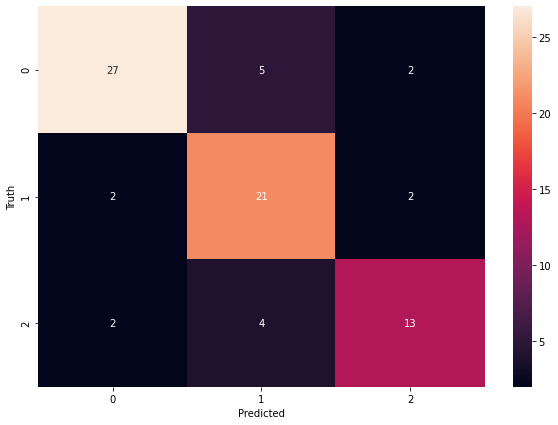

In [14]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
print(clf.score(test_x_vectors, y_test))

0.782051282051282


## Saving Model

In [16]:
import pickle

with open('./models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

#### Load model

In [17]:
with open('./models/sentiment_classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [18]:
print(X_test[0])

loaded_clf.predict(test_x_vectors[0])

I tried to make an award show... I got roasted instead.


array(['Negative'], dtype=object)

## Data Evaluation

Out of curiousity, let's see if the sentiment of a youtube title affects the performance in someway

In [19]:
df= df.drop(['video_title','video_id','Unnamed: 0', 'upload_date'],axis=1)

In [20]:
df

,view_count,like_count,comment_count,sentiment
0,529310,28353,626,Negative
1,672404,36472,1768,Neutral
2,724319,44371,1401,Neutral
3,639884,34661,621,Positive
4,718632,50040,1569,Neutral
...,...,...,...,...
385,731930,28249,1556,Neutral
386,676528,27104,1001,Neutral
387,543726,22746,958,Neutral
388,133735,8258,324,Negative


In [21]:
avg_viewcount = df.groupby('sentiment')['view_count'].mean()
avg_viewcount

sentiment
Negative    675319.724359
Neutral     790285.207407
Positive    797120.232323
Name: view_count, dtype: float64

In [22]:
avg_likecount = df.groupby('sentiment')['like_count'].mean()
avg_likecount

sentiment
Negative    35221.660256
Neutral     37042.000000
Positive    41166.303030
Name: like_count, dtype: float64

In [23]:
avg_commentcount = df.groupby('sentiment')['comment_count'].mean()
avg_commentcount

sentiment
Negative    1173.448718
Neutral     1224.925926
Positive    1237.676768
Name: comment_count, dtype: float64

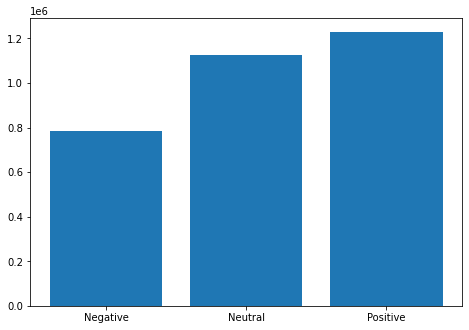

In [24]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(df['sentiment'].head(20),df['view_count'].head(20))
plt.show()

### Although the data suggests a title with a positive sentiment yields better results, we have to keep in mind that the sentiment of a video is not the only factor in how well a Youtube video performs. There are many factors that we cannot measure in a machine learning program such as thumbnail, popular guests featuring in a video,or other factors.

With this in mind, it is still interesting to learn that for this particular Youtube channel, video titles deemed to have a positive sentiment performs the best overall and maybe should be taken into consideration when creating a Youtube video